# Fingerprint effects on ML performance

Adapted for disertation from /parameter_guidelines/evaluation/Effects_on_ML.ipynb

This notebook presents the results from an independent analysis on performance loss of ML models trained on fingerprinted data. The goal is to try to spot trends in the loss as a step towards generalising the guidelines for fingerprint parameters.

For this study, we use 7 data sets (ordered by number of samples):
- (Diabetic data)
- Adult
- Nursery
- (Mushrooms)
- (Bank Personal Loan)
- German credit 
- Breast cancer

and we evaluate the following models on classification problems:
- k-NN
- Logistic regression 
- Gradient boosting
- Random forest
- SVM
- Multi-layer perceptron

In [1]:
import os
os.chdir("C:\\Users\\tsarcevic\\PycharmProjects\\fingerprinting-toolbox")

In [9]:
import matplotlib.pyplot as plt
import matplotlib
import pickle
import numpy as np
import seaborn as sns


import warnings
warnings. filterwarnings('ignore')

In [3]:
datasets = ['adult', 'nursery', 'german_credit', 'breast_cancer']
models = {'mlp':'MLP', 
            'knn': 'k-NN',
             'gb': 'Gradient Boosting', 
             'rf': 'Random Forest', 
             'svm': 'SVM', 
             'lr': 'Logistic Regression'}

In [4]:
# pickle some important objects
DATA_PATH = 'parameter_guidelines/evaluation/fp_effects_on_ML_pickle'
with open(DATA_PATH+'/rel_loss.pickle', 'rb') as infile:
    rel_loss = pickle.load(infile)
with open(DATA_PATH+'/x.pickle', 'rb') as infile:
    x = pickle.load(infile)
with open(DATA_PATH+'/x_german_credit.pickle', 'rb') as infile:
    x_german_credit = pickle.load(infile)
with open(DATA_PATH+'/utility_ml_baseline_avg.pickle', 'rb') as infile:
    utility_ml_baseline_avg = pickle.load(infile)
with open(DATA_PATH+'/utility_ml_baseline.pickle', 'rb') as infile:
    utility_ml_baseline = pickle.load(infile)

In [5]:
def interpolate(array):
    for i in range(len(array)):
        if str(array[i]) == 'nan':
            if i != 0 and i!=len(array)-1:
                array[i] = (array[i-1]+array[i+1])/2
            elif i==0:
                array[i] = (array[i+1])
            elif i==len(array)-1:
                array[i] = array[i-1]
    return array

## 1. Loss measured per dataset

The results below show loss in accuracy for each data set independently. 

The models are color-coded from best performing ones (in dark purple) to lower performing ones (bright yellow) for each particular dataset. 

The plots are arranged according to the data set size descending (i.e. from the largest Diabetic data to the smallest Breast Cancer data).

### 1.1. Adult dataset

In [6]:
rel_loss['adult']['mlp'] = interpolate(rel_loss['adult']['mlp'])
rel_loss['adult']['svm'] = interpolate(rel_loss['adult']['svm'])

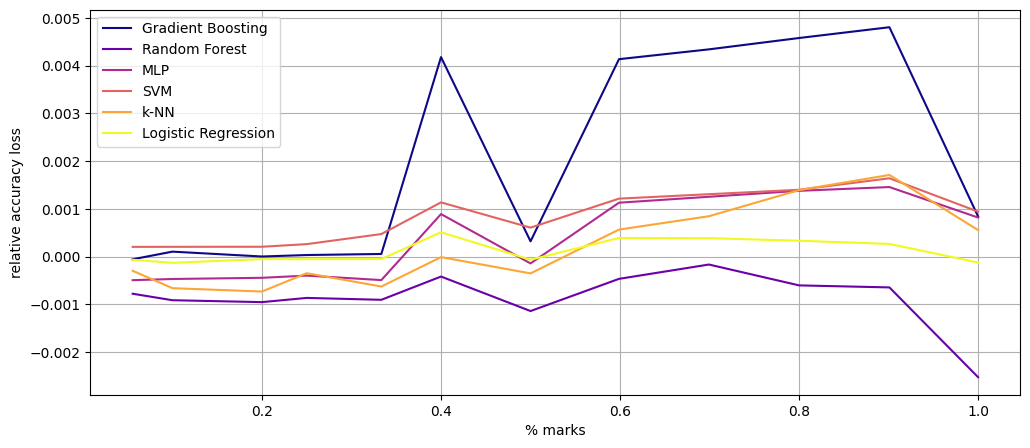

In [10]:
#n_rows = 1; n_cols = 1
fig, ax = plt.subplots(figsize=(12,5))
#plt.figure(figsize=(12,5))
cmap = matplotlib.cm.get_cmap('plasma') # autumn
colors = [cmap(i*(1/5)) for i in range(6)] 
#for ax_row in axs:
#    for ax in ax_row:
#        ax.set_prop_cycle(color=colors) # color coding by baseline performance (darker->better performing model)
ax.set_prop_cycle(color=colors)

# adult
data = 'adult'
for model in utility_ml_baseline_avg[data]:
    if model not in rel_loss[data] or len(rel_loss[data][model]) != len(x):
        print(data, model)
        continue
    plt.plot(x, rel_loss[data][model], label=models[model])
    #plt.set_title(data)
plt.xlabel('% marks')
plt.ylabel('relative accuracy loss')
plt.legend()
plt.grid()

plt.savefig('evaluation/utility/ML/figures/utilityML_adult.svg')
plt.savefig('evaluation/utility/ML/figures/utilityML_adult.png')

### 1.2. Nursery dataset

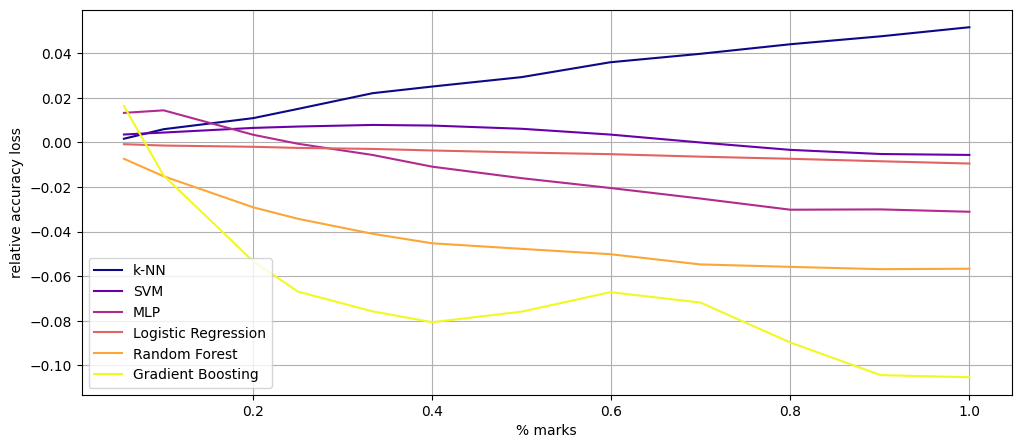

In [11]:
#n_rows = 1; n_cols = 1
fig, ax = plt.subplots(figsize=(12,5))
#plt.figure(figsize=(12,5))
cmap = matplotlib.cm.get_cmap('plasma') # autumn
colors = [cmap(i*(1/5)) for i in range(6)] 
#for ax_row in axs:
#    for ax in ax_row:
#        ax.set_prop_cycle(color=colors) # color coding by baseline performance (darker->better performing model)
ax.set_prop_cycle(color=colors)

# nursery
data = 'nursery'
for model in utility_ml_baseline_avg[data]:
    if model not in rel_loss[data] or len(rel_loss[data][model]) != len(x):
        print(data, model)
        continue
    plt.plot(x, rel_loss[data][model], label=models[model])
    #plt.set_title(data)
plt.xlabel('% marks')
plt.ylabel('relative accuracy loss')
plt.legend()
plt.grid()

plt.savefig('evaluation/utility/ML/figures/utilityML_nursery.svg')
plt.savefig('evaluation/utility/ML/figures/utilityML_nursery.png')

### 1.3. German credit

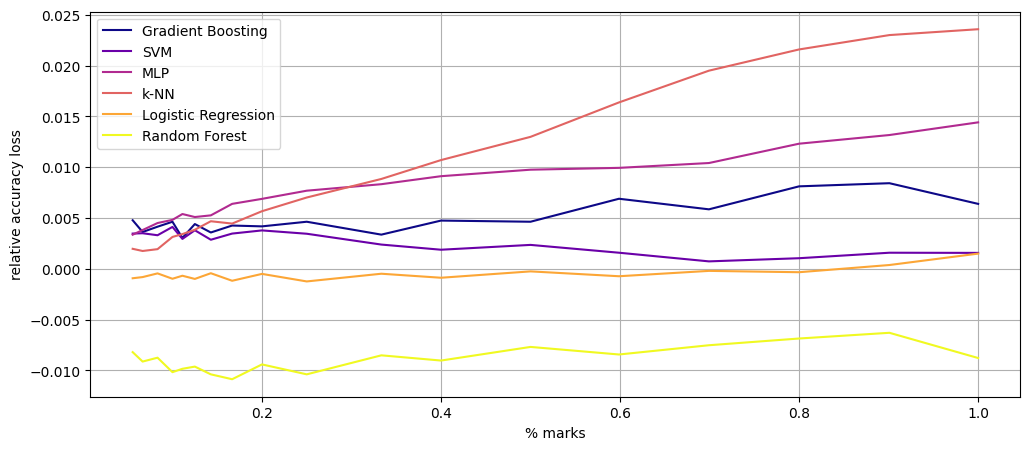

In [12]:
#n_rows = 1; n_cols = 1
fig, ax = plt.subplots(figsize=(12,5))
#plt.figure(figsize=(12,5))
cmap = matplotlib.cm.get_cmap('plasma') # autumn
colors = [cmap(i*(1/5)) for i in range(6)] 
#for ax_row in axs:
#    for ax in ax_row:
#        ax.set_prop_cycle(color=colors) # color coding by baseline performance (darker->better performing model)
ax.set_prop_cycle(color=colors)

# german_credit
data = 'german_credit'
for model in utility_ml_baseline_avg[data]:
    plt.plot(x_german_credit, rel_loss[data][model], label=models[model])
plt.xlabel('% marks')
plt.ylabel('relative accuracy loss')
plt.legend()
plt.grid()

plt.savefig('evaluation/utility/ML/figures/utilityML_germancredit.svg')
plt.savefig('evaluation/utility/ML/figures/utilityML_germancredit.png')

### 1.4. Breast Cancer dataset

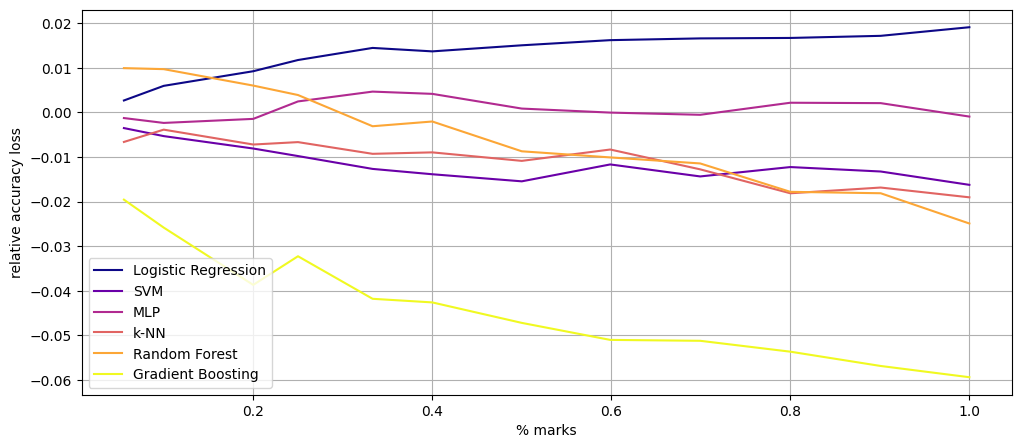

In [13]:
#n_rows = 1; n_cols = 1
fig, ax = plt.subplots(figsize=(12,5))
#plt.figure(figsize=(12,5))
cmap = matplotlib.cm.get_cmap('plasma') # autumn
colors = [cmap(i*(1/5)) for i in range(6)] 
#for ax_row in axs:
#    for ax in ax_row:
#        ax.set_prop_cycle(color=colors) # color coding by baseline performance (darker->better performing model)
ax.set_prop_cycle(color=colors)

# breast_cancer
data = 'breast_cancer'
for model in utility_ml_baseline_avg[data]:
    if model not in rel_loss[data] or len(rel_loss[data][model]) != len(x):
        print(data, model)
        continue
    plt.plot(x, rel_loss[data][model], label=models[model])
    #plt.set_title(data)
plt.xlabel('% marks')
plt.ylabel('relative accuracy loss')
plt.legend()
plt.grid()

plt.savefig('evaluation/utility/ML/figures/utilityML_breastcancer.svg')
plt.savefig('evaluation/utility/ML/figures/utilityML_breastcancer.png')

### 1.5 All datasets

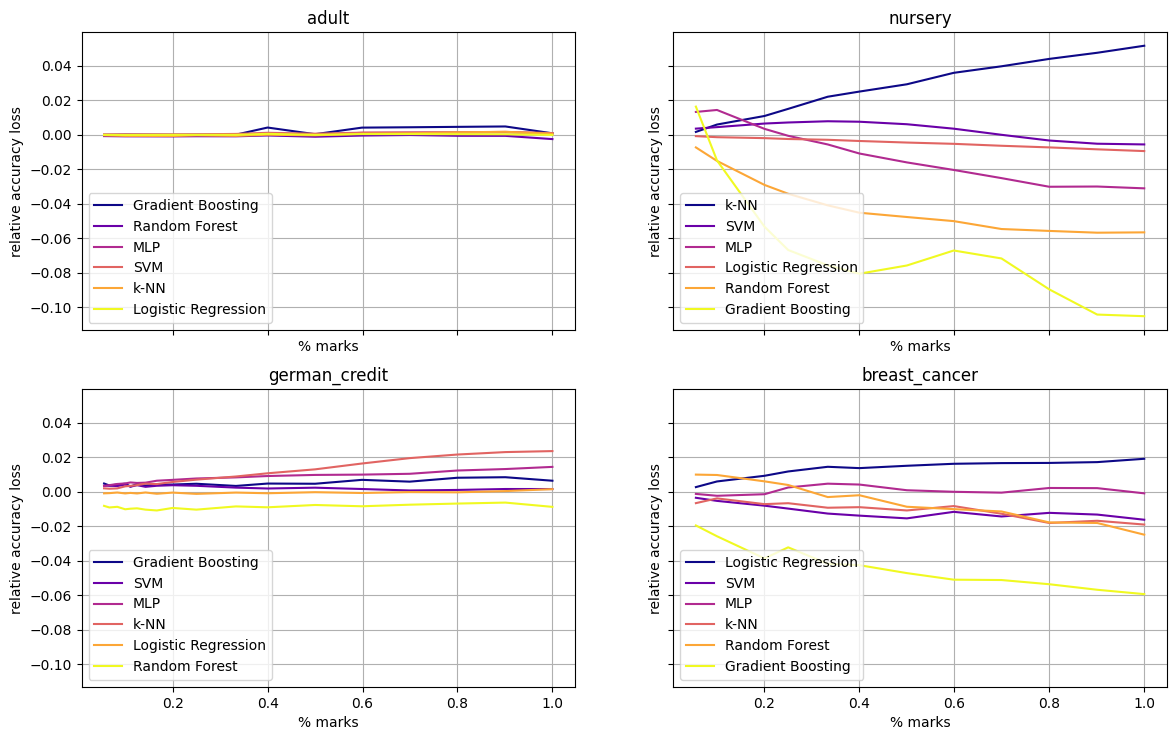

In [17]:
n_rows = 2; n_cols = 2
fig, axs = plt.subplots(n_rows,n_cols, figsize=(14,8.5), sharey=True, sharex=True)
cmap = matplotlib.cm.get_cmap('plasma') # autumn
colors = [cmap(i*(1/5)) for i in range(6)] 
for ax_row in axs:
    for ax in ax_row:
        ax.set_prop_cycle(color=colors) # color coding by baseline performance (darker->better performing model)

# RELATIVE LOSS
for i, data in enumerate(datasets):
    for model in utility_ml_baseline_avg[data]:
        if data == 'german_credit':
            axs[i//n_cols][i%n_cols].plot(x_german_credit, rel_loss[data][model], label=models[model])
            axs[i//n_cols][i%n_cols].set_title(data)
            continue
        #elif data == 'nursery':# or data=='breast_cancer': #or (data=='mushrooms' and model=='rf'):
        #    continue
        if model not in rel_loss[data] or len(rel_loss[data][model]) != len(x):
            print(data, model)
            continue
        axs[i//n_cols][i%n_cols].plot(x, rel_loss[data][model], label=models[model])
        axs[i//n_cols][i%n_cols].set_title(data)

for ax_row in axs:
    for ax in ax_row:   
        ax.set_xlabel('% marks')
        ax.set_ylabel('relative accuracy loss')
        ax.legend()
        ax.grid()
#fig.suptitle('Loss in performance per data set', fontsize=20)

plt.savefig('evaluation/utility/ML/figures/utilityML_loss_per_data.svg')
plt.savefig('evaluation/utility/ML/figures/utilityML_loss_per_data.png')

Some trends can be observed regarding the magnitude of performance loss, which in worse cases reaches 0,04 (i.e. -4% of the original accuracy).

It can also be observed that groups of better performing models have larger losses as more fingerprint modifications are introduced (except e.g. bank personal loan data). One possible explanation is that it happens because the evaluated models are not optimised for the task (default setup of the analysis), especially the worse performing ones, which allows random noise to act as sort of a regulariser in such underfitted models.  

The largest data sets (Diabetic and Adult) seem to have a stable and low loss in perfromance. It is hard to say if this is a general rule because the trend doesn't follow for further data sets.

In some cases we even have "performance enhancement" (loss lines going under 0), such as most models on "nursery" dataset, some models on "breast cancer" and random forest on "mushrooms" data. The explanation for this could again be the underfitting of the models.  

## 2. Loss per ML model type

The results below show the accuracy loss for each model type independently.

The bars represent the average loss and the error bar spans from minimum to maximmum recorded loss. 

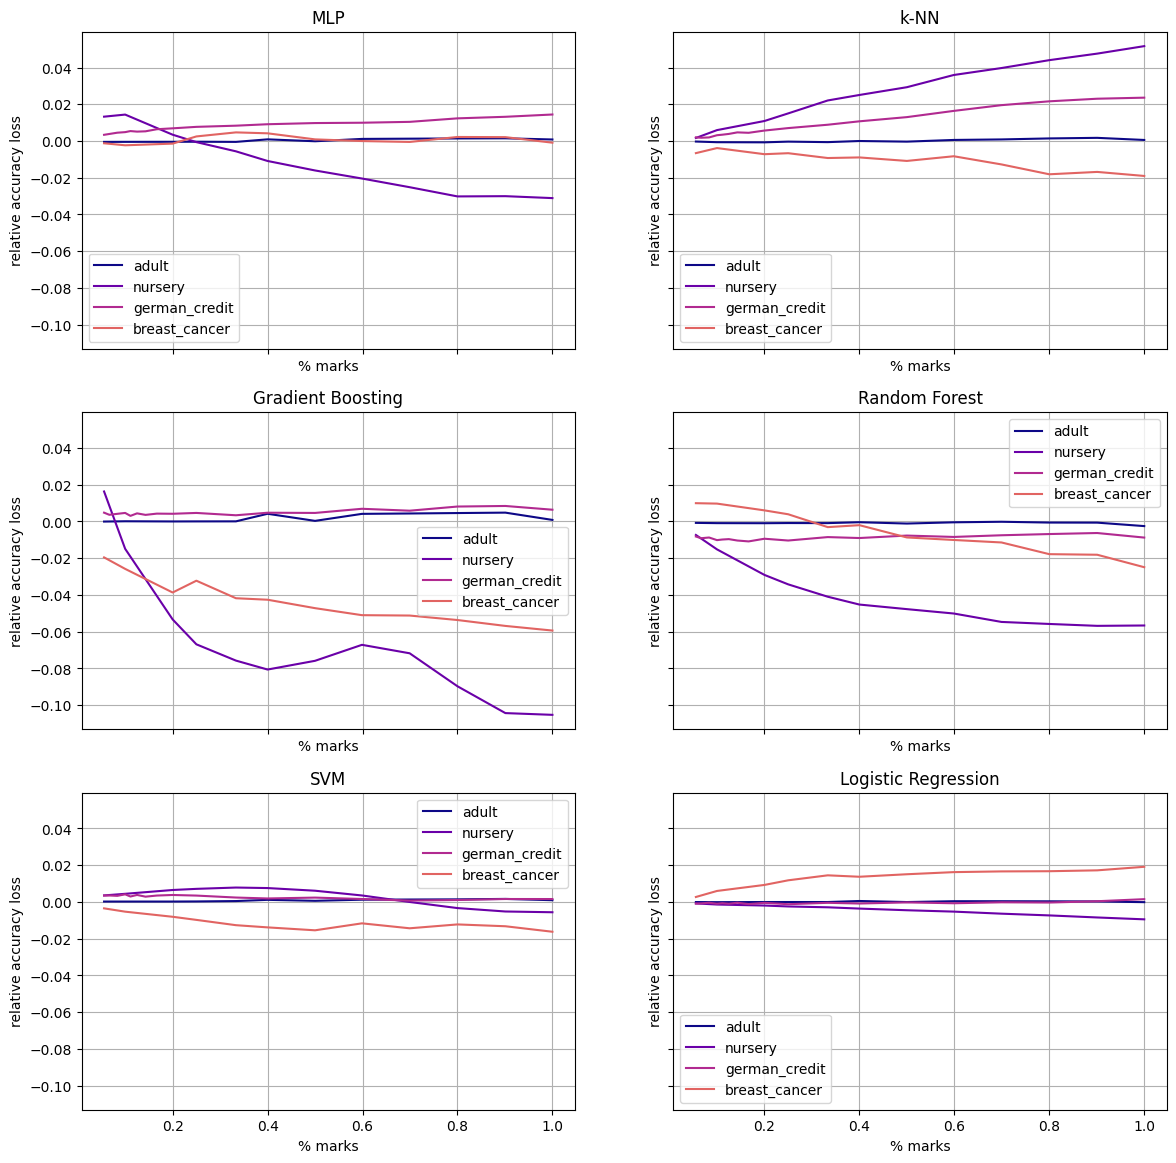

In [19]:
n_rows = 3; n_cols = 2
fig, axs = plt.subplots(n_rows,n_cols, figsize=(14,14), sharey=True, sharex=True)
cmap = matplotlib.cm.get_cmap('plasma') # autumn
colors = [cmap(i*(1/5)) for i in range(6)] 
for ax_row in axs:
    for ax in ax_row:
        ax.set_prop_cycle(color=colors) # color coding by baseline performance (darker->better performing model)

# RELATIVE LOSS
for i, model in enumerate(models):
    for data in datasets:
        if data == 'german_credit':
            axs[i//n_cols][i%n_cols].plot(x_german_credit, rel_loss[data][model], label=data)
            axs[i//n_cols][i%n_cols].set_title(models[model])
            continue
        #elif data == 'nursery':# or data=='breast_cancer': #or (data=='mushrooms' and model=='rf'):
        #    continue
        if model not in rel_loss[data] or len(rel_loss[data][model]) != len(x):
            continue
        axs[i//n_cols][i%n_cols].plot(x, rel_loss[data][model], label=data)
        axs[i//n_cols][i%n_cols].set_title(models[model])

for ax_row in axs:
    for ax in ax_row:   
        ax.set_xlabel('% marks')
        ax.set_ylabel('relative accuracy loss')
        ax.legend()
        ax.grid()
#fig.suptitle('Loss in performance per ML model type', fontsize=20)

plt.savefig('evaluation/utility/ML/figures/utilityML_loss_per_model.svg')
plt.savefig('evaluation/utility/ML/figures/utilityML_loss_per_model.png')

As further analysis we group results for each ML model type. 

k-NN shows generally largest performance loss, whereas MLP, SVM and Logistic regression have the lowest and generally stable performance loss (except for the outlier datasets)

Behaviour of random forest is hard to explain since in most of the cases the perfomance actually increases with more fingerprint marks introduced, as well as gradient boosting for diabetic and nursery data sets. 

### Conclusions

According to the conducted analysis, one can obseve the margin of performance loss, which gets no more that 4%. 

However, there are no hard relations between the amount of marks introduced by the fingerprint and the performance loss. This makes it hard to estimate the exact loss for certain parameter setup without an emirical analysis on particular data set. 